# 1.0 Data Preprocessing

In this section, raw datasets will be loaded and cleaned.

## 1.1 Importing libraries

In [36]:
import pandas as pd
import numpy as np

import warnings

from sklearn.neighbors import LocalOutlierFactor
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')

## 1.2 Loading data

In [37]:
df_hour = pd.read_csv("../dataset/hour.csv")
df_day = pd.read_csv("../dataset/day.csv")

In [38]:
df_hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [39]:
df_day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


## 1.3 Renaming columns

In [40]:
df_renamed_day = df_day.rename(
                        columns={'instant':'index',
                                 'dteday':'date',
                                 'yr':'year',
                                 'mnth':'month',
                                 'hr':'hour',
                                 'weathersit':'weather',
                                 'temp':'temperature',
                                 'atemp':'temperaturefelt',
                                 'hum':'humidity',
                                 'casual':'casualuser',
                                 'registered':'registereduser',
                                 'cnt':'count'})
# df_concatenated.head()
df_renamed_day.head()

,index,date,season,year,month,holiday,weekday,workingday,weather,temperature,temperaturefelt,humidity,windspeed,casualuser,registereduser,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## 1.4 Dropping columns

#### check the coorelation relationships

<AxesSubplot:>

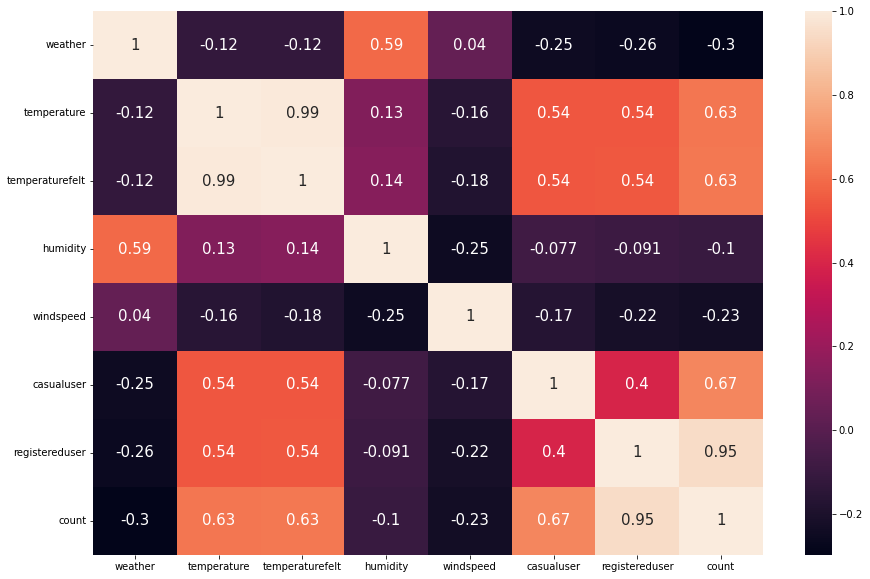

In [41]:
plt.figure(figsize=(15,10))
df_cor = df_renamed_day.copy()
df_cor = df_cor.drop(columns=['index', 'date', 'workingday', 'month', 'season', 'year', 'holiday', 'weekday'])
cor = df_cor.corr()
sns.heatmap(cor, annot = True, annot_kws = {'size': 15})

In [42]:
df_day_data = df_renamed_day.drop(columns=['index', 'date', 'temperaturefelt', 'workingday'])
df_day_data.head()

,season,year,month,holiday,weekday,weather,temperature,humidity,windspeed,casualuser,registereduser,count
0,1,0,1,0,6,2,0.344167,0.805833,0.160446,331,654,985
1,1,0,1,0,0,2,0.363478,0.696087,0.248539,131,670,801
2,1,0,1,0,1,1,0.196364,0.437273,0.248309,120,1229,1349
3,1,0,1,0,2,1,0.200000,0.590435,0.160296,108,1454,1562
4,1,0,1,0,3,1,0.226957,0.436957,0.186900,82,1518,1600


In [43]:
df_day_data.dtypes

season              int64
year                int64
month               int64
holiday             int64
weekday             int64
weather             int64
temperature       float64
humidity          float64
windspeed         float64
casualuser          int64
registereduser      int64
count               int64
dtype: object

## 1.5 Checking for missing values

In [44]:
pd.DataFrame(df_day_data.isnull().sum(), columns=["Count"])

,Count
season,0
year,0
month,0
holiday,0
weekday,0
weather,0
temperature,0
humidity,0
windspeed,0
casualuser,0


## 1.6 Checking for and processing outliers

Only measured data (temperature, humidity, windspeed, casual user, registered user and count) are examined. Data that has a pre-defined set of values are not examined as they will not have any outliers.

### Boxplot

<AxesSubplot:>

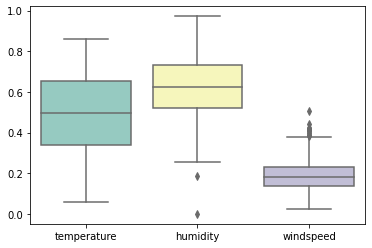

In [45]:
from seaborn import boxplot

boxplot(data=df_day_data[['temperature', 'humidity', 'windspeed']], palette='Set3')

No outliers for `temperature`, but there are outliers for the remaining two.

In [46]:
# Remove outlier values

def remove_outlier(dataset: pd.DataFrame, column: str, threshold: float, operator: str):
    if operator == ">":
        outliers = np.where(dataset[column] > threshold)
    else:
        outliers = np.where(dataset[column] < threshold)
    outliers = outliers[0]
    print("Outlier position: ", outliers)
    return df_day_data.drop(outliers, axis=0)

In [47]:
df_day_cleaned = remove_outlier(df_day_data, 'humidity', 0.3, "<")
df_day_cleaned = remove_outlier(df_day_cleaned, 'windspeed', 0.4, ">")

# Reset index of the dataframe
df_day_cleaned.reset_index(inplace = True)

df_day_cleaned.to_csv("../dataset/df_day_cleaned.csv")
df_day_cleaned

Outlier position:  [ 49  68 451 462 463]
Outlier position:  [ 44 290 380 405 418 430 431 716]


,index,season,year,month,holiday,weekday,weather,temperature,humidity,windspeed,casualuser,registereduser,count
0,0,1,0,1,0,6,2,0.344167,0.805833,0.160446,331,654,985
1,1,1,0,1,0,0,2,0.363478,0.696087,0.248539,131,670,801
2,2,1,0,1,0,1,1,0.196364,0.437273,0.248309,120,1229,1349
3,3,1,0,1,0,2,1,0.200000,0.590435,0.160296,108,1454,1562
4,4,1,0,1,0,3,1,0.226957,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
718,726,1,1,12,0,4,2,0.254167,0.652917,0.350133,247,1867,2114
719,727,1,1,12,0,5,2,0.253333,0.590000,0.155471,644,2451,3095
720,728,1,1,12,0,6,2,0.253333,0.752917,0.124383,159,1182,1341
721,729,1,1,12,0,0,1,0.255833,0.483333,0.350754,364,1432,1796


### IQR Score
The inter-quartile range (IQR) score is used to find the outliers for data related to the users because it is related to the Gaussian Distribution. In many real-life scenarios, the extreme high and extreme low are usually exception cases, which can be considered as outliers.

In [48]:
outlier_day = df_day_cleaned[['casualuser', 'registereduser', 'count']].copy(deep=False) # Shallow copy, any changes will affect original df
outlier_day

,casualuser,registereduser,count
0,331,654,985
1,131,670,801
2,120,1229,1349
3,108,1454,1562
4,82,1518,1600
...,...,...,...
718,247,1867,2114
719,644,2451,3095
720,159,1182,1341
721,364,1432,1796


In [49]:
Q1 = outlier_day.quantile(0.25)
Q3 = outlier_day.quantile(0.75)
IQR = Q3 - Q1
IQR

casualuser         791.5
registereduser    2307.0
count             2837.0
dtype: float64

`False` means values are valid and `True` means values are outliers. For these three columns, no outliers are found.

In [50]:
outliers = pd.DataFrame(outlier_day < (Q1 - 1.5 * IQR) |(outlier_day > (Q3 + 1.5 * IQR)))
outliers.to_csv('../dataset/outliers.csv')

outliers

,casualuser,registereduser,count
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
718,False,False,False
719,False,False,False
720,False,False,False
721,False,False,False


## 1.7 Conducting exploratory analysis

### Import Libraries

In [51]:
# # save cleaned test data to csv file for later use
# df_day = pd.read_csv("../dataset/day.csv")
# export_csv = df_cleaned.to_csv("../dataset/cleaned.csv", index = None, header=True)
# # df_cleaned

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Plot graphs

#### add new column for categories of temperature, humidity and windspeed

In [53]:
df_day_data['temp_cat'] = 0.0
df_day_data['hum_cat'] = 0.0
df_day_data['wind_cat'] = 0.0
        
for i in range(len(df_day_data)):
    # temperature
    if(df_day_data['temperature'][i] < 0.0):
        df_day_data['temp_cat'][i] = '< 0.0'
    elif(df_day_data['temperature'][i] >= 0.0 and df_day_data['temperature'][i] < 0.1):
        df_day_data['temp_cat'][i] = '0.0 - 0.1'
    elif (df_day_data['temperature'][i] >= 0.1 and df_day_data['temperature'][i] < 0.2):
        df_day_data['temp_cat'][i] = '0.1 - 0.2'
    elif (df_day_data['temperature'][i] >= 0.1 and df_day_data['temperature'][i] < 0.3):
        df_day_data['temp_cat'][i] = '0.2 - 0.3'
    elif (df_day_data['temperature'][i] >= 0.3 and df_day_data['temperature'][i] < 0.4):
        df_day_data['temp_cat'][i] = '0.3 - 0.4'
    elif (df_day_data['temperature'][i] >= 0.4 and df_day_data['temperature'][i] < 0.5):
        df_day_data['temp_cat'][i] = '0.4 - 0.5'
    elif (df_day_data['temperature'][i] >= 0.5 and df_day_data['temperature'][i] < 0.6):
        df_day_data['temp_cat'][i] = '0.5 - 0.6'
    elif (df_day_data['temperature'][i] >= 0.6 and df_day_data['temperature'][i] < 0.7):
        df_day_data['temp_cat'][i] = '0.6 - 0.7'
    elif (df_day_data['temperature'][i] >= 0.7 and df_day_data['temperature'][i] < 0.8):
        df_day_data['temp_cat'][i] = '0.7 - 0.8'
    elif (df_day_data['temperature'][i] >= 0.8 and df_day_data['temperature'][i] < 0.9):
        df_day_data['temp_cat'][i] = '0.8 - 0.9'
    elif (df_day_data['temperature'][i] >= 0.9 and df_day_data['temperature'][i] < 1.0):
        df_day_data['temp_cat'][i] = '0.9 - 1.0'
    else:
        df_day_data['temp_cat'][i] = '> 1.0'
        
    # humidity
    if(df_day_data['humidity'][i] < 0.0):
        df_day_data['hum_cat'][i] = '< 0.0'
    elif(df_day_data['humidity'][i] >= 0.0 and df_day_data['humidity'][i] < 0.1):
        df_day_data['hum_cat'][i] = '0.0 - 0.1'
    elif (df_day_data['humidity'][i] >= 0.1 and df_day_data['humidity'][i] < 0.2):
        df_day_data['hum_cat'][i] = '0.1 - 0.2'
    elif (df_day_data['humidity'][i] >= 0.1 and df_day_data['humidity'][i] < 0.3):
        df_day_data['hum_cat'][i] = '0.2 - 0.3'
    elif (df_day_data['humidity'][i] >= 0.3 and df_day_data['humidity'][i] < 0.4):
        df_day_data['hum_cat'][i] = '0.3 - 0.4'
    elif (df_day_data['humidity'][i] >= 0.4 and df_day_data['humidity'][i] < 0.5):
        df_day_data['hum_cat'][i] = '0.4 - 0.5'
    elif (df_day_data['humidity'][i] >= 0.5 and df_day_data['humidity'][i] < 0.6):
        df_day_data['hum_cat'][i] = '0.5 - 0.6'
    elif (df_day_data['humidity'][i] >= 0.6 and df_day_data['humidity'][i] < 0.7):
        df_day_data['hum_cat'][i] = '0.6 - 0.7'
    elif (df_day_data['humidity'][i] >= 0.7 and df_day_data['humidity'][i] < 0.8):
        df_day_data['hum_cat'][i] = '0.7 - 0.8'
    elif (df_day_data['humidity'][i] >= 0.8 and df_day_data['humidity'][i] < 0.9):
        df_day_data['hum_cat'][i] = '0.8 - 0.9'
    elif (df_day_data['humidity'][i] >= 0.9 and df_day_data['humidity'][i] < 1.0):
        df_day_data['hum_cat'][i] = '0.9 - 1.0'
    else:
        df_day_data['hum_cat'][i] = '> 1.0'
        
    # windspeed
    if(df_day_data['windspeed'][i] < 0.0):
        df_day_data['wind_cat'][i] = '< 0.0'
    elif(df_day_data['windspeed'][i] >= 0.0 and df_day_data['windspeed'][i] < 0.1):
        df_day_data['wind_cat'][i] = '0.0 - 0.1'
    elif (df_day_data['windspeed'][i] >= 0.1 and df_day_data['windspeed'][i] < 0.2):
        df_day_data['wind_cat'][i] = '0.1 - 0.2'
    elif (df_day_data['windspeed'][i] >= 0.1 and df_day_data['windspeed'][i] < 0.3):
        df_day_data['wind_cat'][i] = '0.2 - 0.3'
    elif (df_day_data['windspeed'][i] >= 0.3 and df_day_data['windspeed'][i] < 0.4):
        df_day_data['wind_cat'][i] = '0.3 - 0.4'
    elif (df_day_data['windspeed'][i] >= 0.4 and df_day_data['windspeed'][i] < 0.5):
        df_day_data['wind_cat'][i] = '0.4 - 0.5'
    elif (df_day_data['windspeed'][i] >= 0.5 and df_day_data['windspeed'][i] < 0.6):
        df_day_data['wind_cat'][i] = '0.5 - 0.6'
    elif (df_day_data['windspeed'][i] >= 0.6 and df_day_data['windspeed'][i] < 0.7):
        df_day_data['wind_cat'][i] = '0.6 - 0.7'
    elif (df_day_data['windspeed'][i] >= 0.7 and df_day_data['windspeed'][i] < 0.8):
        df_day_data['wind_cat'][i] = '0.7 - 0.8'
    elif (df_day_data['windspeed'][i] >= 0.8 and df_day_data['windspeed'][i] < 0.9):
        df_day_data['wind_cat'][i] = '0.8 - 0.9'
    elif (df_day_data['windspeed'][i] >= 0.9 and df_day_data['windspeed'][i] < 1.0):
        df_day_data['wind_cat'][i] = '0.9 - 1.0'
    else:
        df_day_data['wind_cat'][i] = '> 1.0'

df2 = df_day_data

# # (t+8)/(47), t_min=-8, t_max=+39
# df2["New Temp"] = 0.0
# for i in range(len(df2)):
#     df2["New Temp"][i] = (df2["temperature"][i] * 47) - 8
    
df_day_data = df_day_data.drop(columns=['temp_cat', 'hum_cat', 'wind_cat'])

df_day_data.head()

,season,year,month,holiday,weekday,weather,temperature,humidity,windspeed,casualuser,registereduser,count
0,1,0,1,0,6,2,0.344167,0.805833,0.160446,331,654,985
1,1,0,1,0,0,2,0.363478,0.696087,0.248539,131,670,801
2,1,0,1,0,1,1,0.196364,0.437273,0.248309,120,1229,1349
3,1,0,1,0,2,1,0.200000,0.590435,0.160296,108,1454,1562
4,1,0,1,0,3,1,0.226957,0.436957,0.186900,82,1518,1600


#### Count of bikes during weekdays and weekends

[Text(0.5, 1.0, ''), Text(0.5, 0, 'Month'), Text(0, 0.5, 'Count')]

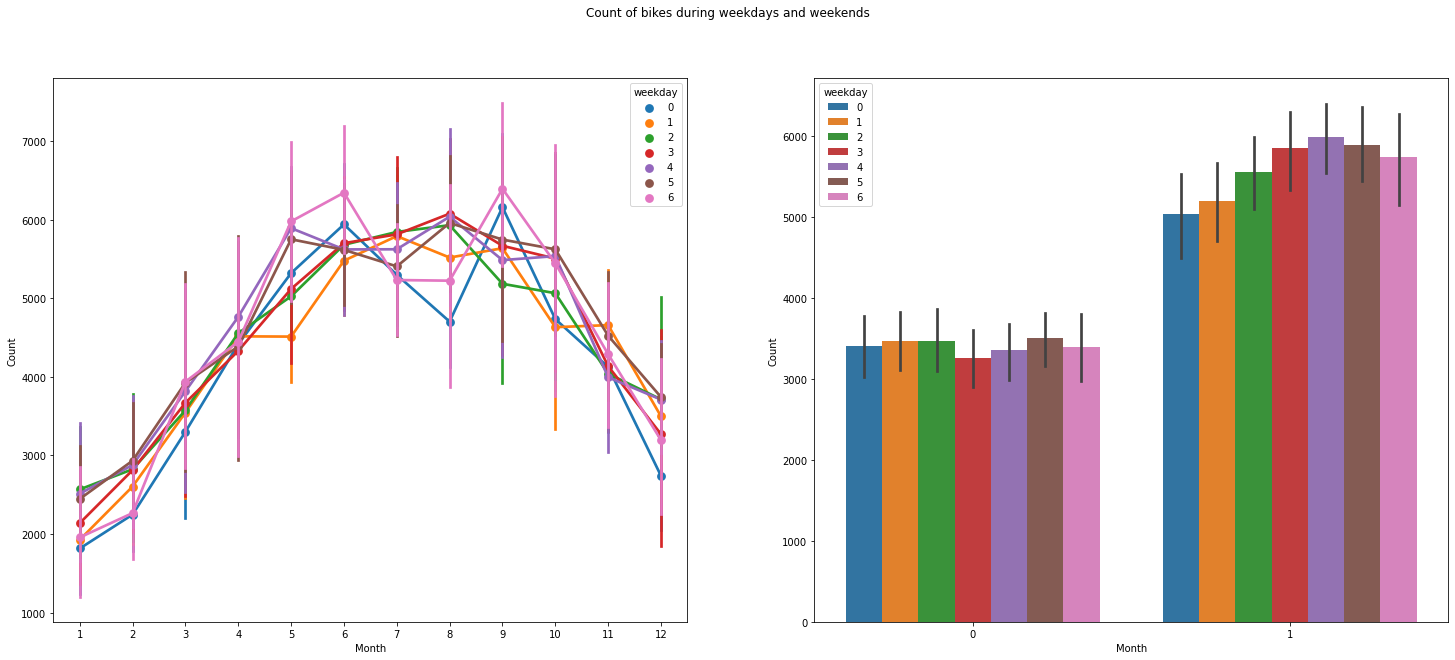

In [54]:
figure, axes = plt.subplots(1, 2, figsize = (25, 10))

figure.suptitle("Count of bikes during weekdays and weekends")

sns.pointplot(data = df_day_data, x = 'month', y = 'count', hue = 'weekday', ax = axes[0])
axes[0].set(title = '', xlabel = 'Month', ylabel = 'Count')

sns.barplot(data = df_day_data, x = 'year', y = 'count', hue = 'weekday', ax = axes[1])
axes[1].set(title = '', xlabel = 'Month', ylabel = 'Count')

#### Count of bikes during seasons

<AxesSubplot:xlabel='year', ylabel='count'>

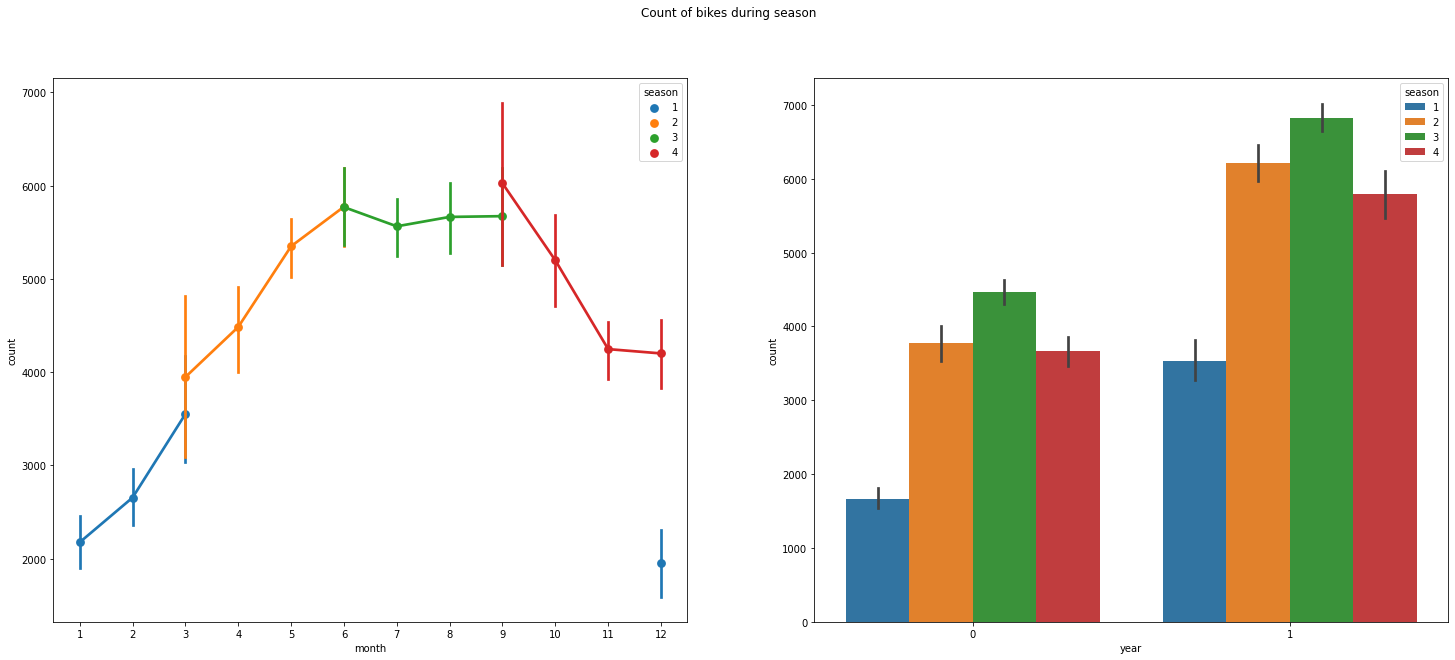

In [55]:
figure, axes = plt.subplots(1, 2, figsize = (25, 10))

figure.suptitle("Count of bikes during season")

sns.pointplot(data = df_day_data, x = 'month', y = 'count', hue = 'season', ax = axes[0])

sns.barplot(data = df_day_data, x = 'year', y = 'count', hue = 'season', ax = axes[1])

#### Count of bikes with weather

<AxesSubplot:xlabel='year', ylabel='count'>

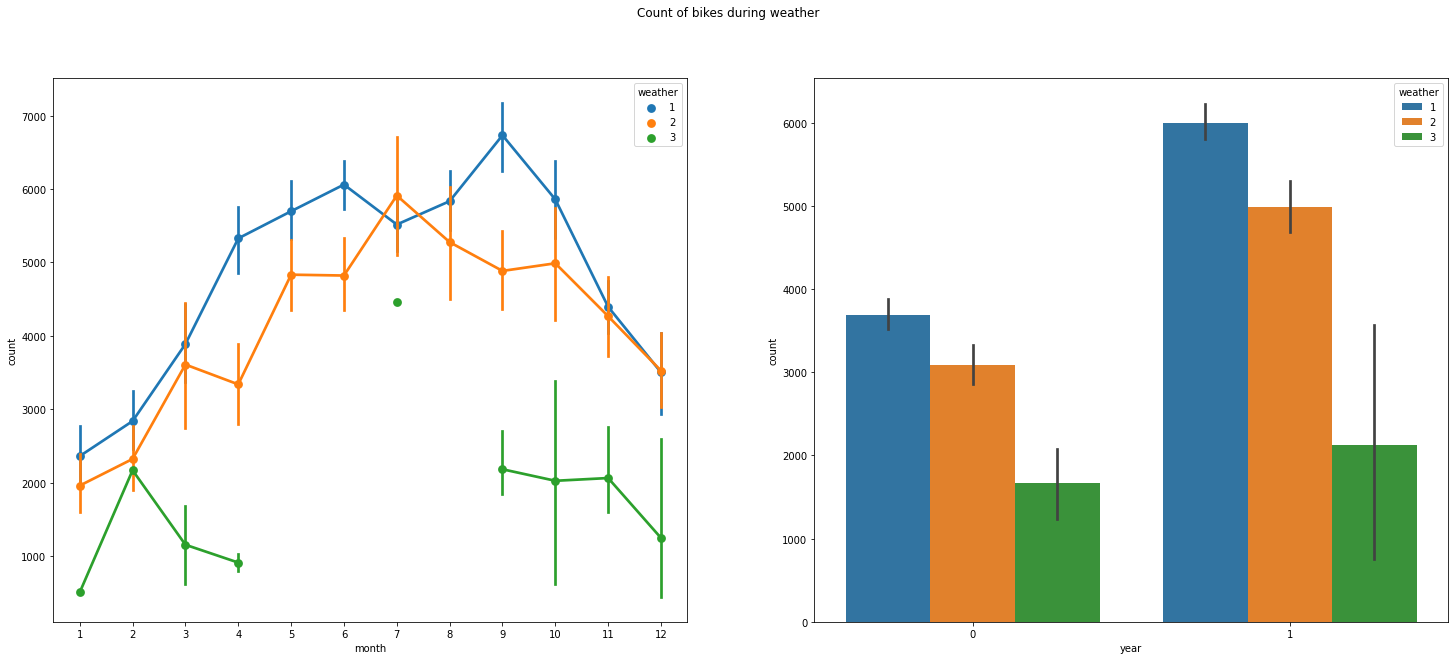

In [56]:
figure, axes = plt.subplots(1, 2, figsize = (25, 10))

figure.suptitle("Count of bikes during weather")

sns.pointplot(data = df_day_data, x = 'month', y = 'count', hue = 'weather', ax = axes[0])

sns.barplot(data = df_day_data, x = 'year', y = 'count', hue = 'weather', ax = axes[1])

#### Count of bikes with temperature

<AxesSubplot:xlabel='month', ylabel='count'>

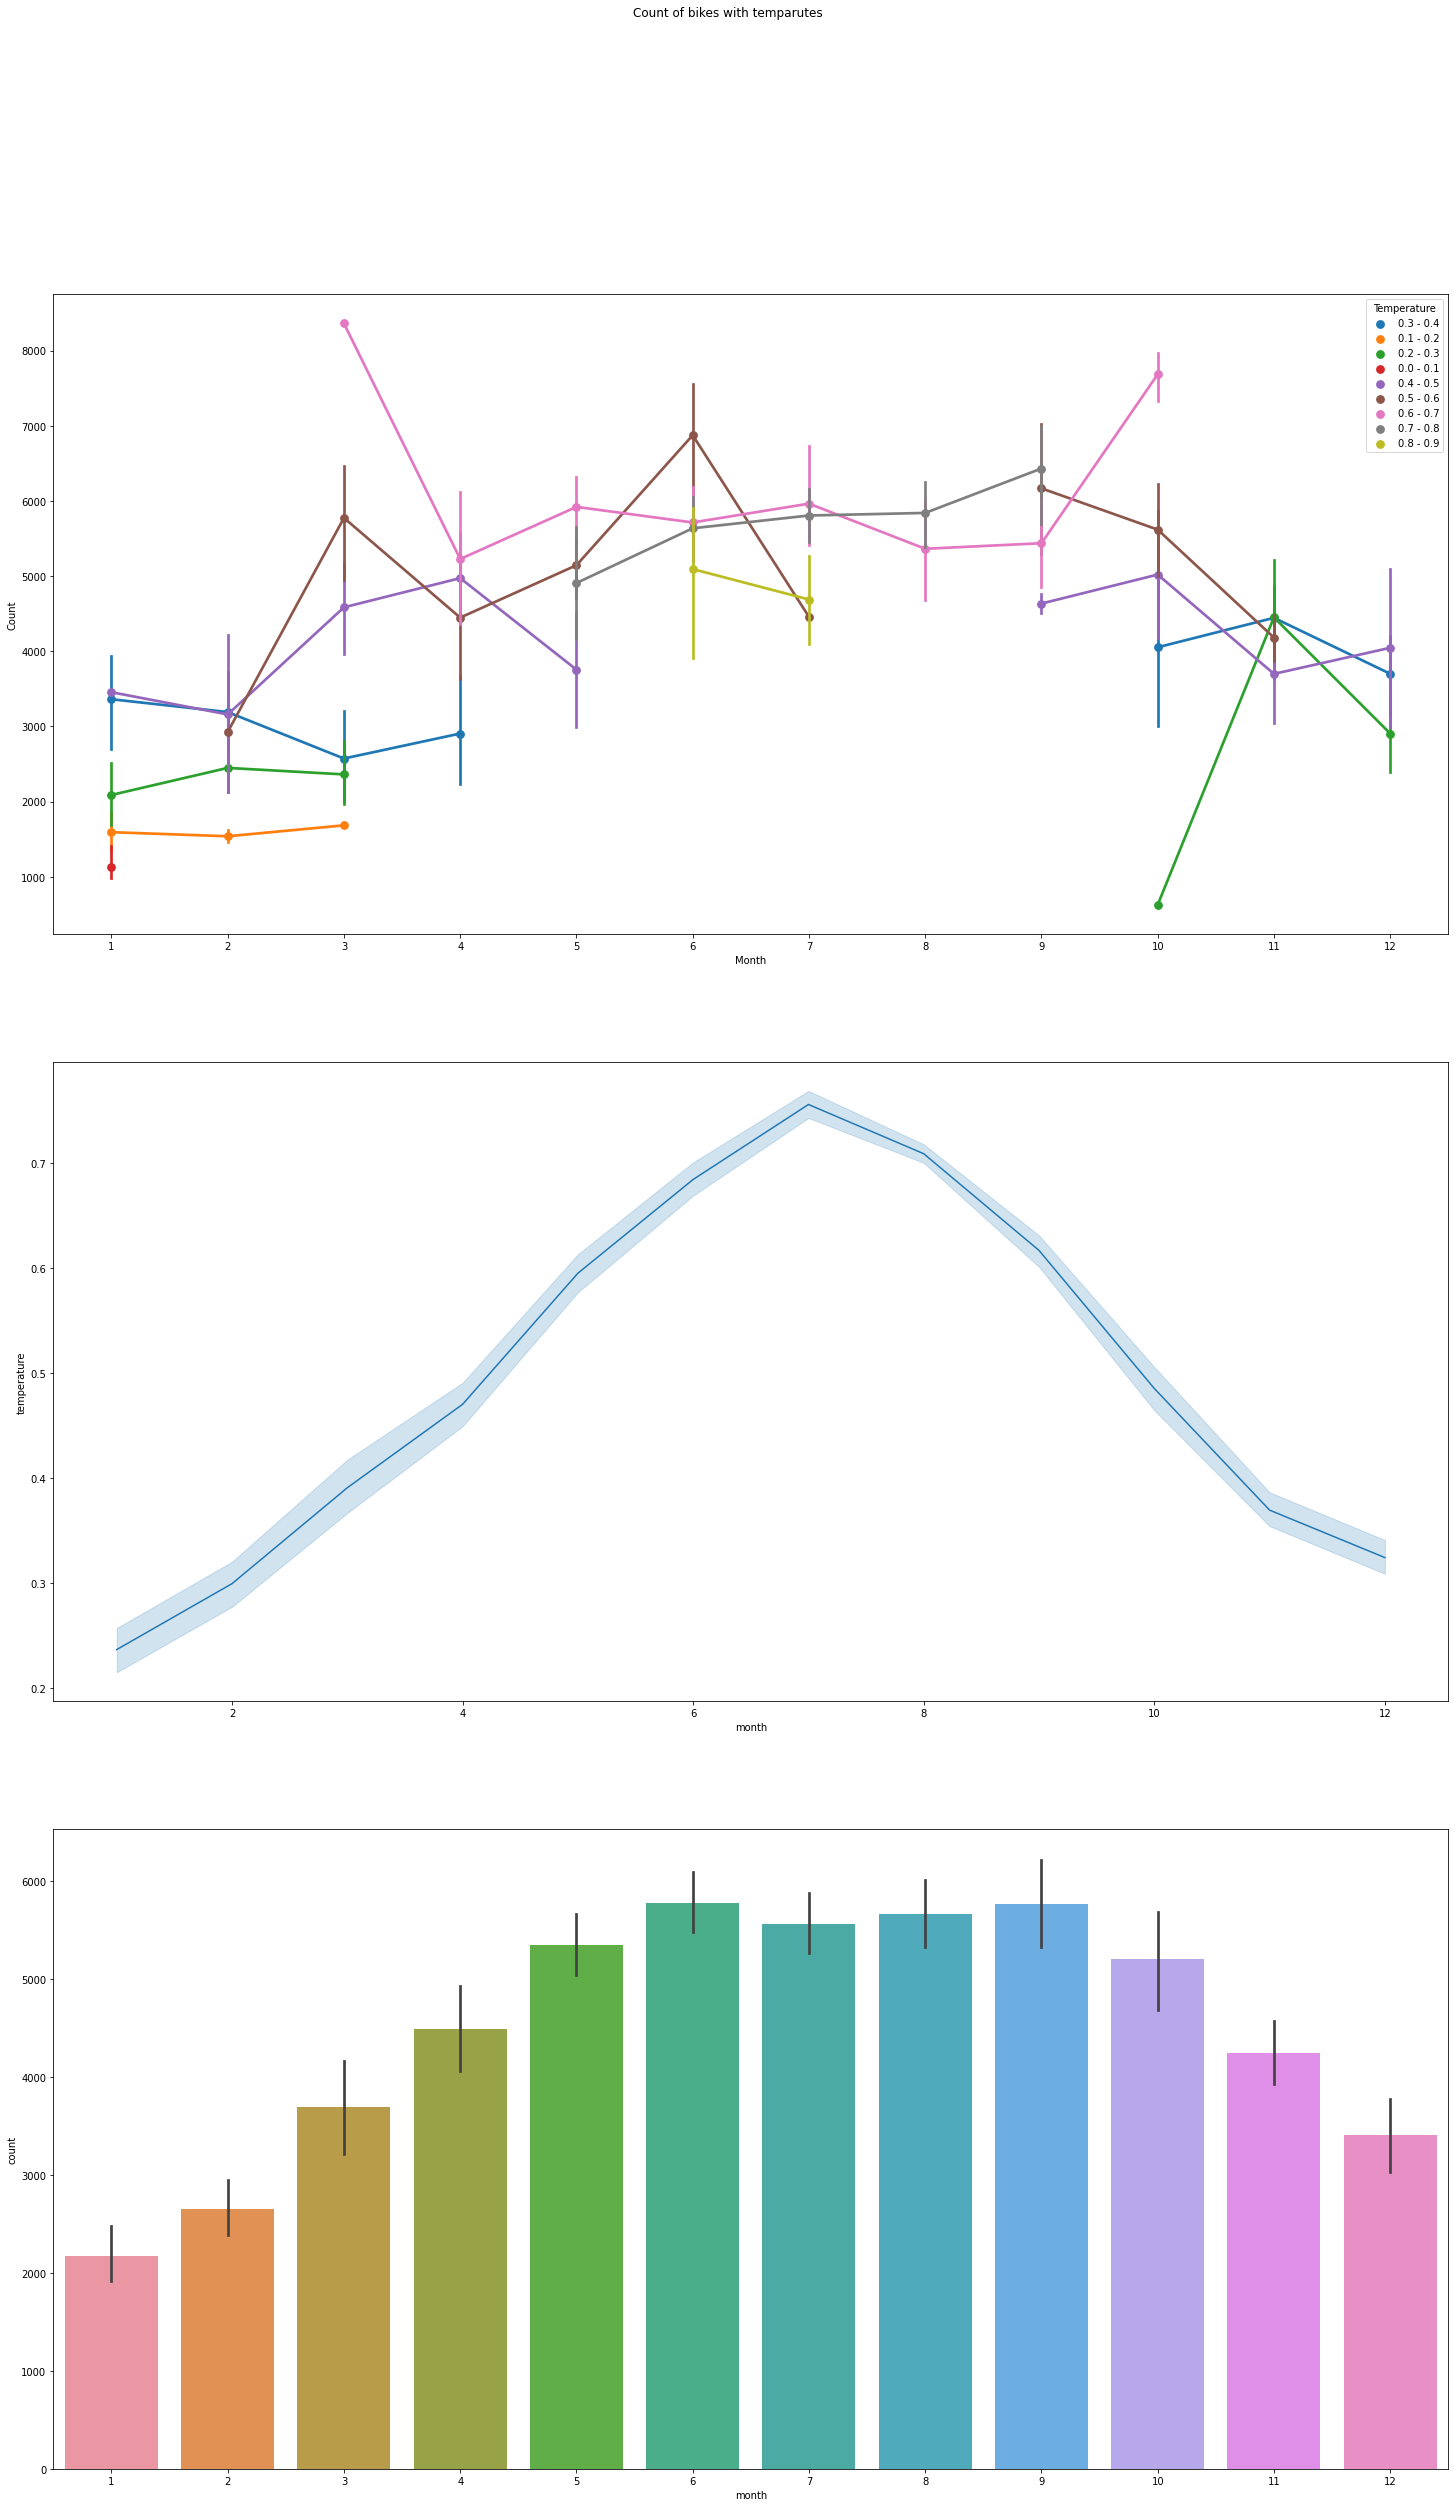

In [57]:
figure, axes = plt.subplots(3, 1, figsize = (25, 40))

figure.suptitle("Count of bikes with temparutes")

sns.pointplot(data = df2, x = 'month', y = 'count', hue = 'temp_cat', ax = axes[0])
axes[0].legend(title='Temperature')
axes[0].set(title = '', xlabel = 'Month', ylabel = 'Count')

sns.lineplot(data = df2, x = 'month', y = 'temperature', ax = axes[1])
sns.barplot(data = df2, x = 'month', y = 'count', ax = axes[2])

#### Count of bikes with humidity

[Text(0.5, 1.0, ''), Text(0.5, 0, 'Year'), Text(0, 0.5, 'Count')]

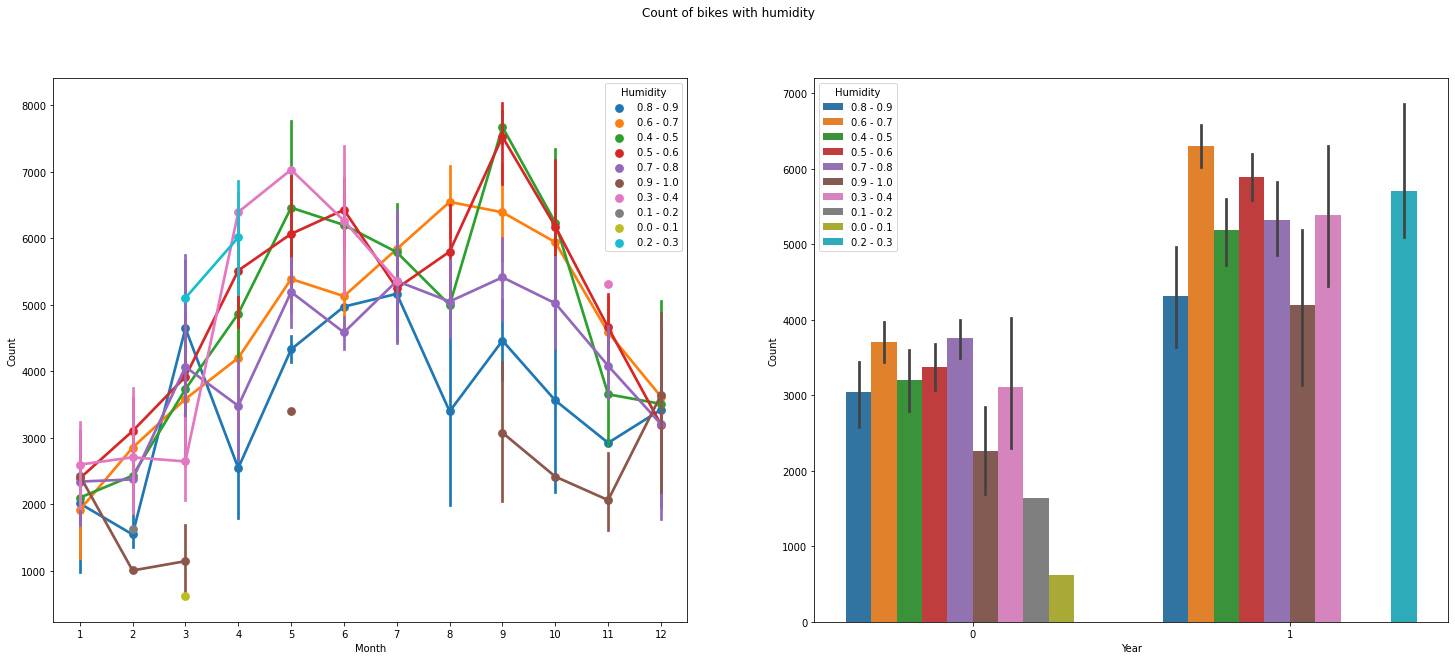

In [58]:
figure, axes = plt.subplots(1, 2, figsize = (25, 10))

figure.suptitle("Count of bikes with humidity")

sns.pointplot(data = df2, x = 'month', y = 'count', hue = 'hum_cat', ax = axes[0])
axes[0].legend(title='Humidity')
axes[0].set(title = '', xlabel = 'Month', ylabel = 'Count')

sns.barplot(data = df2, x = 'year', y = 'count', hue = 'hum_cat', ax = axes[1])
axes[1].legend(title='Humidity')
axes[1].set(title = '', xlabel = 'Year', ylabel = 'Count')

#### Count of bikes with windspeed

[Text(0.5, 1.0, ''), Text(0.5, 0, 'Year'), Text(0, 0.5, 'Count')]

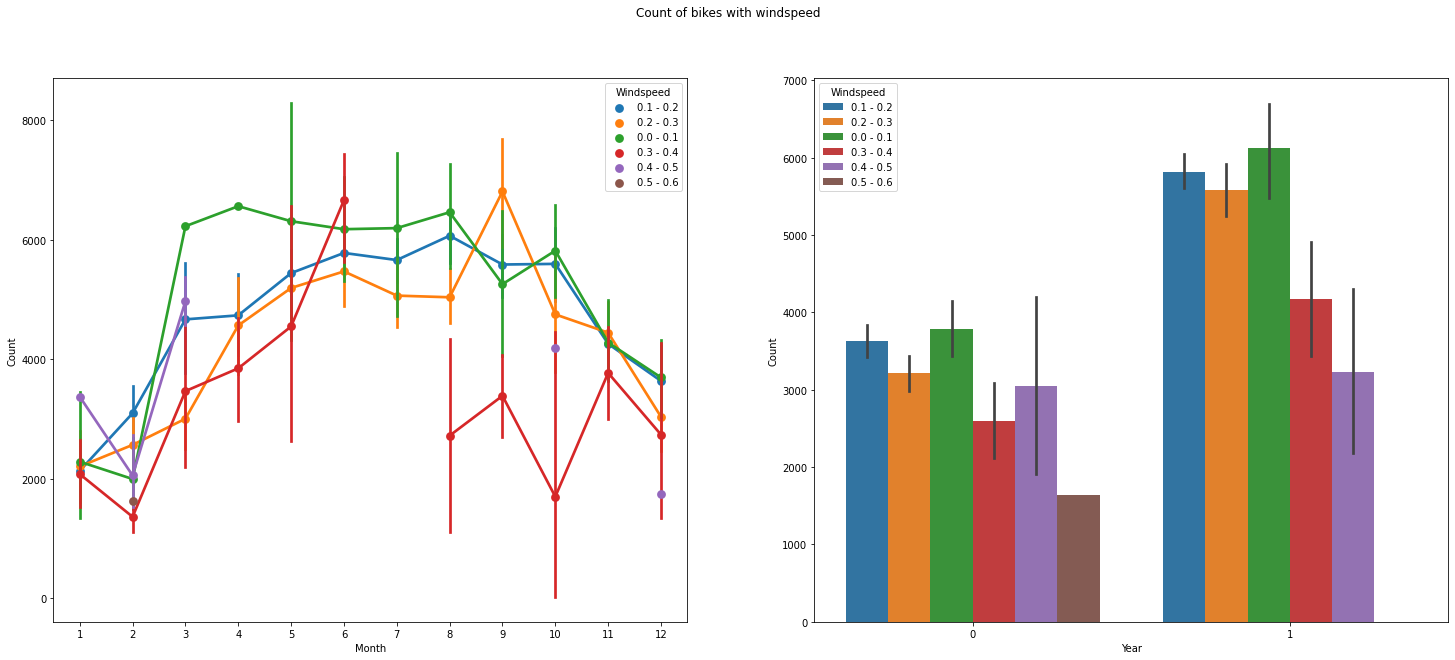

In [59]:
figure, axes = plt.subplots(1, 2, figsize = (25, 10))

figure.suptitle("Count of bikes with windspeed")

sns.pointplot(data = df2, x = 'month', y = 'count', hue = 'wind_cat', ax = axes[0])
axes[0].legend(title='Windspeed')
axes[0].set(title = '', xlabel = 'Month', ylabel = 'Count')

sns.barplot(data = df2, x = 'year', y = 'count', hue = 'wind_cat', ax = axes[1])
axes[1].legend(title='Windspeed')
axes[1].set(title = '', xlabel = 'Year', ylabel = 'Count')

#### Registered users

[Text(0.5, 0, 'Year'), Text(0, 0.5, 'Registered User')]

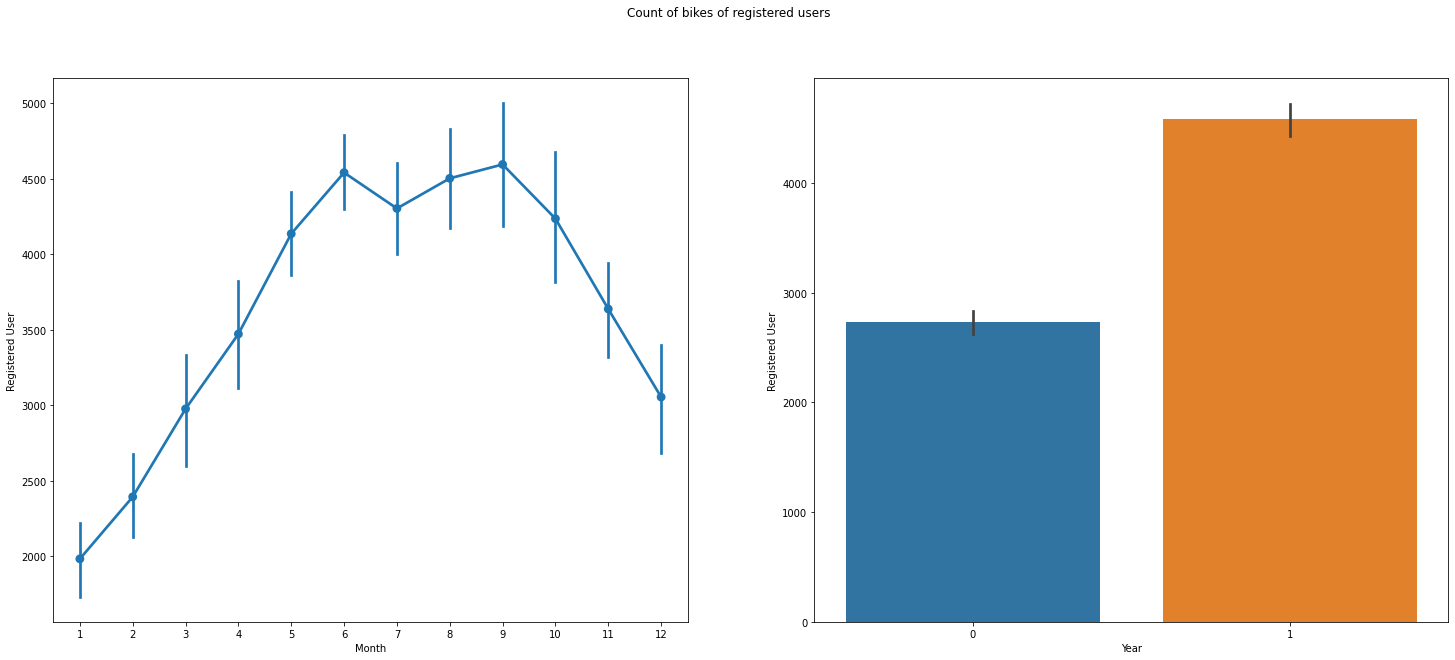

In [60]:
figure, axes = plt.subplots(1, 2, figsize = (25, 10))

figure.suptitle("Count of bikes of registered users")

sns.pointplot(data = df_day_data, x = 'month', y = 'registereduser', ax = axes[0])
axes[0].set(xlabel = 'Month', ylabel = 'Registered User')

sns.barplot(data = df_day_data, x = 'year', y = 'registereduser', ax = axes[1])
axes[1].set(xlabel = 'Year', ylabel = 'Registered User')

#### Unregistered users


[Text(0.5, 0, 'Year'), Text(0, 0.5, 'Unregistered User')]

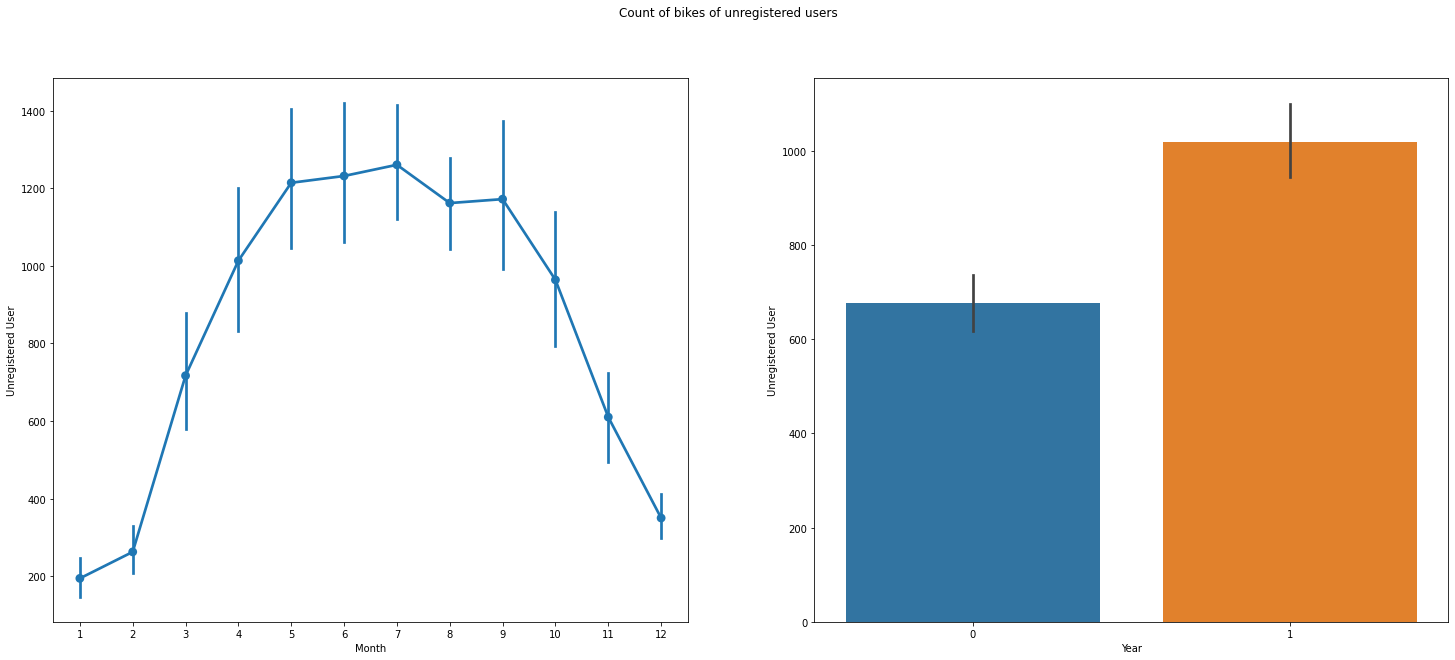

In [61]:
figure, axes = plt.subplots(1, 2, figsize = (25, 10))

figure.suptitle("Count of bikes of unregistered users")

sns.pointplot(data = df_day_data, x = 'month', y = 'casualuser', ax = axes[0])
axes[0].set(xlabel = 'Month', ylabel = 'Unregistered User')

sns.barplot(data = df_day_data, x = 'year', y = 'casualuser', ax = axes[1])
axes[1].set(xlabel = 'Year', ylabel = 'Unregistered User')

## Split Data

Data with outliers & without

In [62]:
# Split with outliers
from sklearn.model_selection import train_test_split
X_bike = df_day_data.drop(['casualuser', 'registereduser', 'count'], axis=1)
y_bike = df_day_data['count']

print(X_bike.head())

X_train, X_test, y_train, y_test = train_test_split (X_bike, y_bike, test_size = 0.2, random_state = 0)
print(X_train.head())
print(X_test.head())

   season  year  month  holiday  weekday  weather  temperature  humidity  \
0       1     0      1        0        6        2     0.344167  0.805833   
1       1     0      1        0        0        2     0.363478  0.696087   
2       1     0      1        0        1        1     0.196364  0.437273   
3       1     0      1        0        2        1     0.200000  0.590435   
4       1     0      1        0        3        1     0.226957  0.436957   

   windspeed  
0   0.160446  
1   0.248539  
2   0.248309  
3   0.160296  
4   0.186900  
     season  year  month  holiday  weekday  weather  temperature  humidity  \
97        2     0      4        0        5        2     0.335833  0.836250   
503       2     1      5        0        5        1     0.564167  0.523333   
642       4     1     10        0        4        2     0.657500  0.722917   
498       2     1      5        0        0        1     0.612500  0.576250   
303       4     0     10        0        1        1     0.34000

In [63]:
# Split with no outliers
from sklearn.model_selection import train_test_split
X_bike_no = df_day_cleaned.drop(['casualuser', 'registereduser', 'count', 'index'], axis=1)
y_bike_no = df_day_cleaned['count']

X_bike_no.head()

,season,year,month,holiday,weekday,weather,temperature,humidity,windspeed
0,1,0,1,0,6,2,0.344167,0.805833,0.160446
1,1,0,1,0,0,2,0.363478,0.696087,0.248539
2,1,0,1,0,1,1,0.196364,0.437273,0.248309
3,1,0,1,0,2,1,0.200000,0.590435,0.160296
4,1,0,1,0,3,1,0.226957,0.436957,0.186900


In [64]:
y_bike_no.head()

0     985
1     801
2    1349
3    1562
4    1600
Name: count, dtype: int64

In [65]:
X_train_no, X_test_no, y_train_no, y_test_no = train_test_split (X_bike_no, y_bike_no, test_size = 0.2, random_state = 0)
X_train_no.head()

,season,year,month,holiday,weekday,weather,temperature,humidity,windspeed
380,1,1,1,0,4,1,0.190000,0.497500,0.220158
490,2,1,5,0,6,1,0.564167,0.480417,0.123133
196,3,0,7,0,0,1,0.719167,0.604167,0.245033
240,3,0,8,0,2,1,0.639167,0.548333,0.125008
17,1,0,1,0,2,2,0.216667,0.861667,0.146775


In [66]:
X_test_no.head()

,season,year,month,holiday,weekday,weather,temperature,humidity,windspeed
568,3,1,7,0,0,1,0.721667,0.623750,0.170396
495,2,1,5,0,4,1,0.593333,0.520000,0.229475
573,3,1,8,0,5,2,0.765833,0.642500,0.215792
454,2,1,4,0,5,1,0.403333,0.377083,0.300388
667,4,1,11,0,1,1,0.319167,0.494167,0.236325


In [67]:
y_train

97     1471
503    7639
642    7328
498    6118
303    3669
       ... 
707    5582
192    4258
629    8167
559    7499
684    5445
Name: count, Length: 584, dtype: int64

In [68]:
y_train = y_train.to_frame()
y_test = y_test.to_frame()
y_train_no = y_train_no.to_frame()
y_test_no = y_test_no.to_frame()

### Normalise data with MinMax Scaler

In [69]:
from sklearn.preprocessing import MinMaxScaler

X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.transform(X_test)

X_train_no = X_scaler.transform(X_train_no)
X_test_no = X_scaler.transform(X_test_no)

y_train = y_scaler.fit_transform(y_train)
y_test = y_scaler.transform(y_test)
y_train_no = y_scaler.fit_transform(y_train_no)
y_test_no = y_scaler.transform(y_test_no)

X_train = pd.DataFrame(X_train, columns = ['season', 'year', 'month', 'holiday', 'weekday', 'weather', 'temperature', 'humidity', 'windspeed'])
X_test = pd.DataFrame(X_test, columns = ['season', 'year', 'month', 'holiday', 'weekday', 'weather', 'temperature', 'humidity', 'windspeed'])
X_train_no = pd.DataFrame(X_train_no, columns = ['season', 'year', 'month', 'holiday', 'weekday', 'weather', 'temperature', 'humidity', 'windspeed'])
X_test_no = pd.DataFrame(X_test_no, columns = ['season', 'year', 'month', 'holiday', 'weekday', 'weather', 'temperature', 'humidity', 'windspeed'])

y_train = pd.DataFrame(y_train, columns = ['count'])
y_test = pd.DataFrame(y_test, columns = ['count'])
y_train_no = pd.DataFrame(y_train_no, columns = ['count'])
y_test_no = pd.DataFrame(y_test_no, columns = ['count'])

### Save file

In [70]:
X_train.to_csv("../dataset/with_outliers/X_train.csv", index = False)
X_test.to_csv("../dataset/with_outliers/X_test.csv", index = False)
y_train.to_csv("../dataset/with_outliers/y_train.csv", index = False)
y_test.to_csv("../dataset/with_outliers/y_test.csv", index = False)

X_train_no.to_csv("../dataset/no_outliers/X_train.csv", index = False)
X_test_no.to_csv("../dataset/no_outliers/X_test.csv", index = False)
y_train_no.to_csv("../dataset/no_outliers/y_train.csv", index = False)
y_test_no.to_csv("../dataset/no_outliers/y_test.csv", index = False)